In [2]:
import csv
import pandas as pd
import requests
import os
from collections import defaultdict
from datetime import timedelta
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import matplotlib

In [3]:
data=pd.read_csv("../dataset/pred_time.csv")

In [4]:
data

,Unnamed: 0,FacilityID,InstallYear,Diameter,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks
0,0,MAIN-6943-13636,1969,6.0,1997-01-02,0,0,0,1,1969-01-01,-8435.0,10228.0,0.0
1,1,MAIN-6336-18809,1959,8.0,1997-02-04,1,0,0,0,1959-01-01,-8402.0,13914.0,0.0
2,2,MAIN-5744-15604,1917,10.0,1997-10-08,0,0,1,0,1917-01-01,-8156.0,29500.0,0.0
3,3,MAIN-3749-6440,1950,6.0,1998-08-01,0,1,0,0,1950-01-01,-7859.0,17744.0,0.0
4,4,MAIN-6860-16497,1966,8.0,1998-08-21,1,0,0,0,1966-01-01,-7839.0,11920.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23143,23143,MAIN-1448-25169,2020,8.0,NaN,0,0,0,1,2020-01-01,NaN,inf,0.0
23144,23144,MAIN-1447-25170,2020,8.0,NaN,0,0,0,1,2020-01-01,NaN,inf,0.0
23145,23145,MAIN-2656-25171,1969,6.0,NaN,0,0,0,1,1969-01-01,NaN,inf,0.0
23146,23146,MAIN-2455-1168,1994,16.0,NaN,0,0,0,1,1994-01-01,NaN,inf,0.0


In [5]:
df=data[data["since_prev_break"]!=float('inf')]
df
#"break_date","InstallYear_2"

,Unnamed: 0,FacilityID,InstallYear,Diameter,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks
0,0,MAIN-6943-13636,1969,6.0,1997-01-02,0,0,0,1,1969-01-01,-8435.0,10228.0,0.0
1,1,MAIN-6336-18809,1959,8.0,1997-02-04,1,0,0,0,1959-01-01,-8402.0,13914.0,0.0
2,2,MAIN-5744-15604,1917,10.0,1997-10-08,0,0,1,0,1917-01-01,-8156.0,29500.0,0.0
3,3,MAIN-3749-6440,1950,6.0,1998-08-01,0,1,0,0,1950-01-01,-7859.0,17744.0,0.0
4,4,MAIN-6860-16497,1966,8.0,1998-08-21,1,0,0,0,1966-01-01,-7839.0,11920.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,3400,MAIN-2853-3313,1965,10.0,2019-09-25,1,0,0,0,1965-01-01,-134.0,19990.0,0.0
3401,3401,MAIN-4949-5931,2006,6.0,2019-09-28,0,0,0,1,2006-01-01,-131.0,5018.0,0.0
3402,3402,MAIN-2859-4488,1995,10.0,2019-10-02,0,0,0,1,1995-01-01,-127.0,2108.0,1.0
3403,3403,MAIN-6729-19170,1970,12.0,2019-10-06,0,0,0,1,1970-01-01,-123.0,18175.0,0.0


In [6]:
xcols = ["prior_breaks", "InstallYear","Diameter","CI","SPUN","SAND","DI","break_date_2"]
ycol = "since_prev_break"

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[ycol], test_size=0.1)

In [8]:
from sklearn import linear_model
import numpy as np                   
    
clf=linear_model.Ridge(alpha=0.01)
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)

prediction[prediction<0]=0

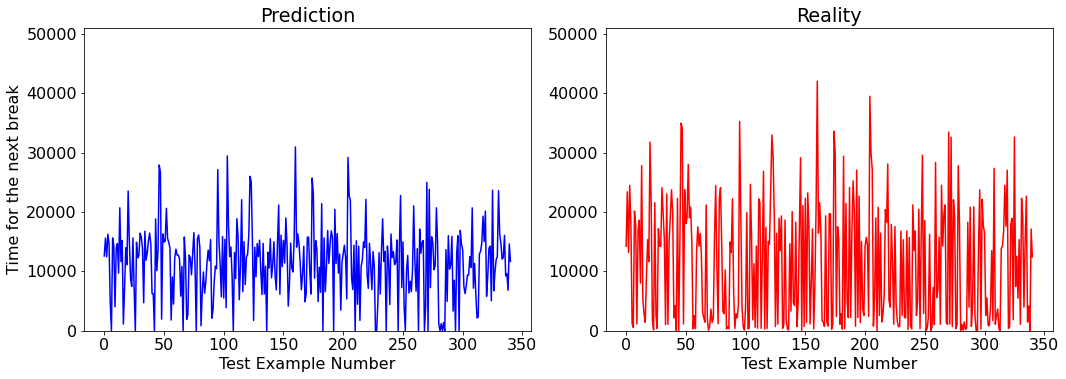

In [9]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(321)
ax.plot(prediction,color="blue")
bx = fig.add_subplot(322)
bx.plot(y_test.tolist(),color="red")
ax.set_xlabel("Test Example Number")
bx.set_xlabel("Test Example Number")
ax.set_ylabel("Time for the next break")
ax.set_ylim(0,51000)
bx.set_ylim(0,51000)
ax.set_title("Prediction")
bx.set_title("Reality")
plt.tight_layout()
#plt.savefig('evaluation.pdf',format='pdf',bbox_inches="tight")

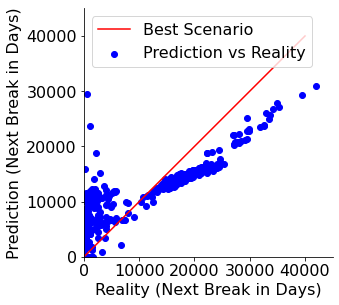

In [10]:
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(5,4.5))
ax = fig.add_subplot(111)
ax.scatter(y_test.tolist(),prediction.tolist(),color="blue",label="Prediction vs Reality")
ax.plot([0,40000],[0,40000],color="red",label="Best Scenario")
ax.set_xlabel("Reality (Next Break in Days)")
ax.set_ylabel("Prediction (Next Break in Days)")
ax.set_ylim(0,45000)
ax.set_xlim(0,45000)
ax.spines["top"].set_visible(False)

ax.spines["right"].set_visible(False)
ax.legend(loc=2)
plt.tight_layout()
#plt.savefig('evaluation2.pdf',format='pdf',bbox_inches="tight")

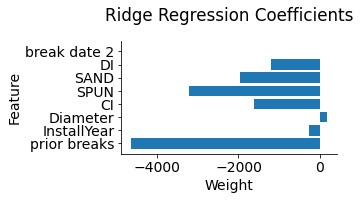

In [11]:
matplotlib.rcParams.update({'font.size': 14})
idx = [t.replace("_", " ") for t in xcols]
fig,ax = plt.subplots(figsize=(5,3))
ax.barh(idx,clf.coef_)
ax.set_xlabel("Weight")
ax.set_ylabel("Feature")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Ridge Regression Coefficients", pad=20)
plt.tight_layout()
#plt.savefig('weights.pdf',format='pdf',bbox_inches="tight")

In [12]:
##Now retrain on the entire set and formulate predictions

In [13]:
clf2=linear_model.Ridge(alpha=0.01)
clf2.fit(df[xcols], df[ycol])
data=data.fillna(0)
prediction2=clf2.predict(data[xcols])

In [14]:
data=data.replace(float('inf'), np.nan)
data=data.fillna(0)
data["Predict"]=round(prediction2-data["since_prev_break"])/365
data[data["Predict"]<0]=0

In [15]:
wm = geopandas.read_file("zip://../dataset/WaterMains.zip")
wm

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,Shape_STLe,geometry
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ..."
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ..."
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ..."
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ..."
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ..."
...,...,...,...,...,...,...,...,...,...,...
22515,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ..."
22516,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ..."
22517,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ..."
22518,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ..."


In [16]:
ms=wm.merge(data, on='FacilityID', how='left')
ms

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter_x,Material,Bagged,LiningType,Shape_STLe,geometry,...,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks,Predict
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23040,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23041,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ...",...,0,0.0,0.0,0.0,1.0,1969-01-01,0.0,0.0,0.0,37.364384
23042,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ...",...,0,0.0,0.0,0.0,1.0,1994-01-01,0.0,0.0,0.0,24.169863


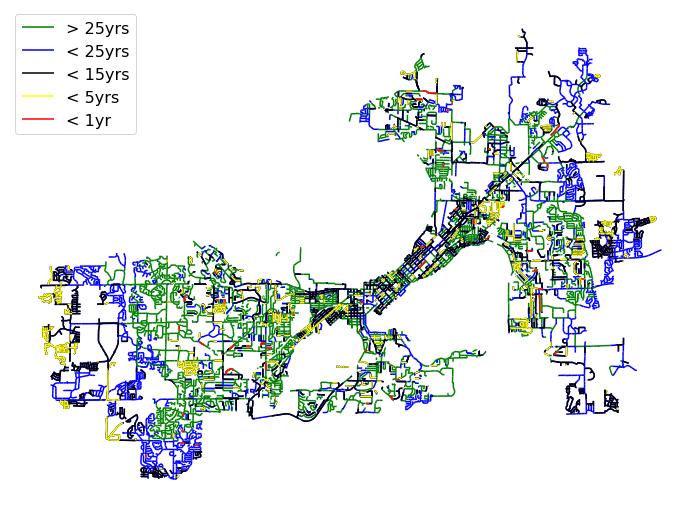

In [17]:
matplotlib.rcParams.update({'font.size': 16})

fig,ax = plt.subplots(figsize=(10,10))
ms[ms["Predict"]>25].plot(color = "green",ax=ax,label="> 25yrs")
ms[ms["Predict"]<=25].plot(color = "blue",ax=ax,label="< 25yrs")
ms[ms["Predict"]<=15].plot(color = "black",ax=ax,label="< 15yrs")
ms[ms["Predict"]<=5].plot(color = "yellow",ax=ax,label="< 5yrs")
ms[ms["Predict"]<=1].plot(color = "red",ax=ax,label="< 1yr")

ax.legend(loc=2)
ax.axis("off")
plt.tight_layout()

#plt.savefig('future_map.pdf',format='pdf',bbox_inches="tight")

In [17]:
ms["Prediction"]=0
ms.loc[ms['Predict'] > 25, 'Prediction'] = 15
ms.loc[ms['Predict'] < 25, 'Prediction'] = 30
ms.loc[ms['Predict'] < 15, 'Prediction'] = 50
ms.loc[ms['Predict'] < 5, 'Prediction'] = 75
ms.loc[ms['Predict'] < 1 , 'Prediction'] = 100

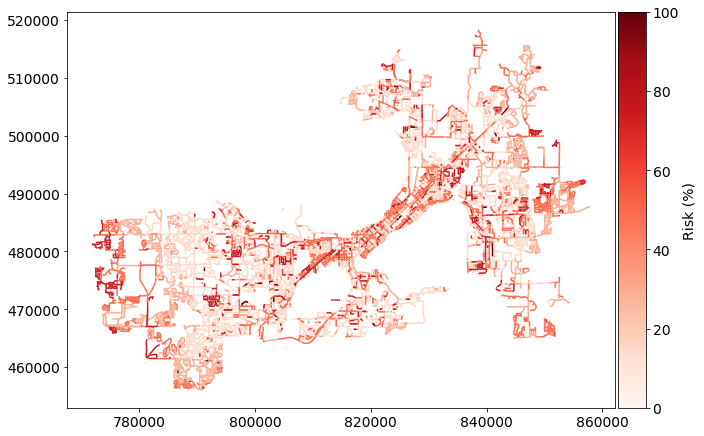

In [18]:
df=ms[["Prediction","Shape_STLe","geometry"]]
matplotlib.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,label="Risk")
df.plot(column="Prediction",cmap="Reds",ax=ax,legend=True,cax=cax,legend_kwds={'label': "Risk (%)"})

plt.tight_layout()
#plt.savefig('future_map.pdf',format='pdf',bbox_inches="tight")

In [19]:
ms["Prediction2"]="N/A"
ms.loc[ms['Predict'] > 25, 'Prediction2'] = ">25"
ms.loc[ms['Predict'] <= 25, 'Prediction2'] = "<25"
ms.loc[ms['Predict'] <= 15, 'Prediction2'] = "<15"
ms.loc[ms['Predict'] <= 5, 'Prediction2'] = "<5"
ms.loc[ms['Predict'] <= 1 , 'Prediction2'] = "<=1"

<AxesSubplot:>

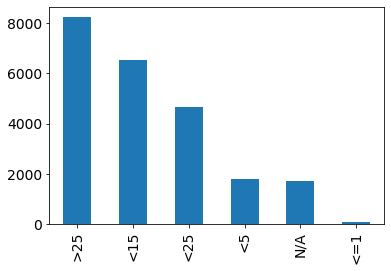

In [20]:
ms['Prediction2'].value_counts().plot.bar()

In [21]:
import shapefile as shp
import math

minx,maxx,miny,maxy = 750000, 860000, 450000, 520000
dx = 1000
dy = 1000

nx = int(math.ceil(abs(maxx - minx)/dx))
ny = int(math.ceil(abs(maxy - miny)/dy))

w = shp.Writer("Hi",shp.POLYGON)
w.autoBalance = 1
w.field("ID")
id=0

for i in range(ny):
    for j in range(nx):
        id+=1
        vertices = []
        parts = []
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*(i+1),miny)])
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*(i+1),miny)])
        parts.append(vertices)
        w.poly(parts)
        w.record(id)

w.close()

In [22]:
mst = geopandas.read_file("zip://Hi.zip")

mst

,ID,geometry
0,1,"POLYGON ((750000.000 520000.000, 751000.000 52..."
1,2,"POLYGON ((751000.000 520000.000, 752000.000 52..."
2,3,"POLYGON ((752000.000 520000.000, 753000.000 52..."
3,4,"POLYGON ((753000.000 520000.000, 754000.000 52..."
4,5,"POLYGON ((754000.000 520000.000, 755000.000 52..."
...,...,...
7695,7696,"POLYGON ((855000.000 451000.000, 856000.000 45..."
7696,7697,"POLYGON ((856000.000 451000.000, 857000.000 45..."
7697,7698,"POLYGON ((857000.000 451000.000, 858000.000 45..."
7698,7699,"POLYGON ((858000.000 451000.000, 859000.000 45..."


In [23]:
m = geopandas.sjoin(mst, ms, how="inner", op='intersects')
m=m[["geometry","Prediction"]]
m=m[m["Prediction"]!=0]
m["index"]=m.index
m

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: ESRI:103412

  """Entry point for launching an IPython kernel.


,geometry,Prediction,index
198,"POLYGON ((838000.000 519000.000, 839000.000 51...",50,198
198,"POLYGON ((838000.000 519000.000, 839000.000 51...",50,198
308,"POLYGON ((838000.000 518000.000, 839000.000 51...",50,308
308,"POLYGON ((838000.000 518000.000, 839000.000 51...",50,308
418,"POLYGON ((838000.000 517000.000, 839000.000 51...",50,418
...,...,...,...
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",30,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",30,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",30,6970
6970,"POLYGON ((790000.000 457000.000, 791000.000 45...",30,6970


In [27]:
g=m.groupby(by='index').agg({'Prediction': 'sum','geometry':'first'}).reset_index()
g=g[["geometry","Prediction"]]
g["Prediction"]/=31.4
lmnop=geopandas.GeoDataFrame(g)

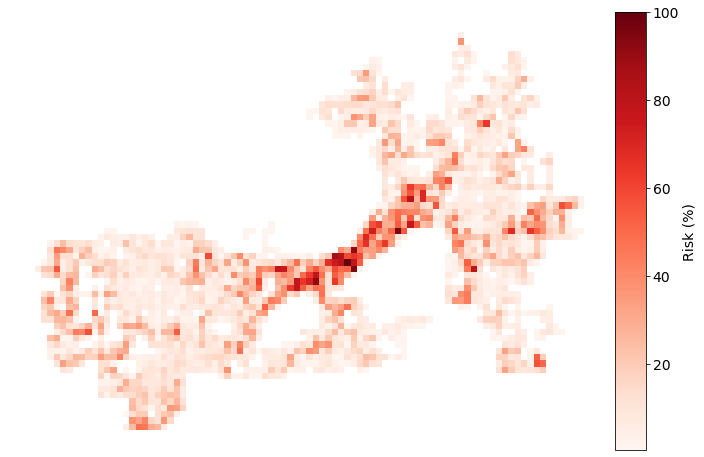

In [34]:
matplotlib.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,label="Risk")
lmnop.plot(column="Prediction",cmap="Reds",ax=ax,legend=True,cax=cax,legend_kwds={'label': "Risk (%)"})
ax.axis("off")
plt.tight_layout()

In [ ]:
#######################################

In [30]:
### At this point g looses its shapely status (my hypothesis)
### Tried a bunch of different things
### Can you suggest a work around

<AxesSubplot:>

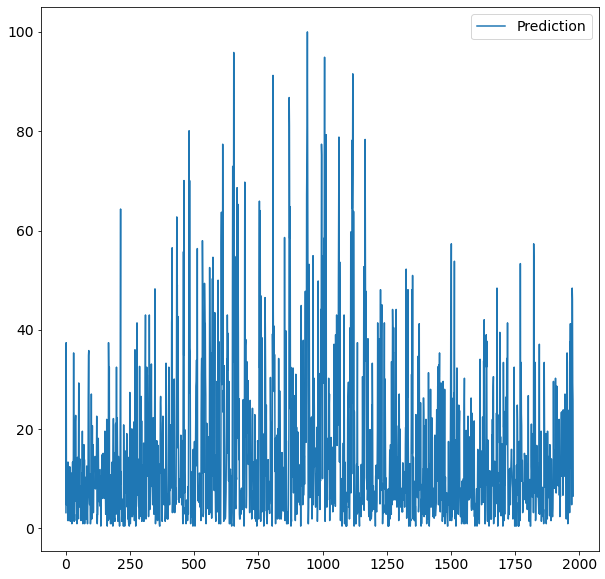

In [31]:
fig,ax = plt.subplots(figsize=(10,10))
g.plot(ax=ax)

In [32]:
mst.to_crs("ESRI:103412")

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_xlim(750000,880000)
ax.set_ylim(450000,520000)
for i in g["geometry"]:
    i

In [ ]:
latMin = 43.04
latMax = 43.150
lonMin = -89.49
lonMax = -89.28

DegLat = 6.903*10 # miles
DegLon = 10.125 * 5 #miles

LatitudeDistanceSteps =   .25/DegLat     # 5 min = .25 miles
LongitudeDistanceSteps =  .25/DegLon

In [ ]:
DiscritizeDict = {}

def discritize(Latdivision, Londivision):
    
    latSteps = Latdivision
    lonSteps = Londivision
    x = 1
    y = 1
    latPoint = latMin
    lonPoint = lonMin
    
    for y in range(int((latMax - latMin)/latSteps)):
        lonPoint = lonMin
        for x in range(int((lonMax - lonMin)/lonSteps)):
            coordStr =  str(y) +"_" + str(x)
            DiscritizeDict[coordStr] = [latPoint, lonPoint]
            x += 1
            lonPoint += lonSteps
            
        y += 1
        x = 1
        latPoint += latSteps       
    
discritize(LatitudeDistanceSteps, LongitudeDistanceSteps)

In [ ]:
# Create a list of the grid squares so that you can find which square the stops fall into. 

gridList = {}

def grid(Latdivision, Londivision):
    
    latSteps = Latdivision
    lonSteps = Londivision
    x = 1
    y = 1
    latPoint = latMin
    lonPoint = lonMin
    n = 1
    
    for y in range(int((latMax - latMin)/latSteps)):
        lonPoint = lonMin
        for x in range(int((lonMax - lonMin)/lonSteps)):
            Num =  str(n)
            gridList[Num] = [[latPoint, latPoint + latSteps] , [lonPoint, lonPoint+lonSteps]]
            x += 1
            lonPoint += lonSteps
            n += 1
            
        y += 1
        x = 1
        latPoint += latSteps       
    
#discritize(.01, .03)
grid(LatitudeDistanceSteps, LongitudeDistanceSteps)

gridList

In [ ]:

HeatMapDict = DiscritizedHeatMap8am

Maximum = 10.8
max_value = 1000
viridis = cm.get_cmap('RdPu_r', max_value)

ax = df.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)

for key in HeatMapDict:
    #print(sum(HeatMapDict[key])/len(HeatMapDict[key]))
    colorVal = cm.RdPu_r(max(HeatMapDict[key])/Maximum)
    #print(colorVal)
    ax2 = plt.axvspan(gridList[key][1][0], gridList[key][1][1], ymin=((gridList[key][0][0]-latMin)/(latMax-latMin)), 
                     ymax=((gridList[key][0][1]-latMin)/(latMax-latMin)), color=colorVal, alpha=.7, zorder=4, ec='k')
    
t1 = ('Farthest Distance with Zero Transfers 8AM')
t2 = ('Boxes  = 5 min walking or .25 Miles')
plt.text(-89.385, 43.165, t1, ha='center', wrap=True, fontdict=font1)
plt.text(-89.385, 43.155, t2, ha='center', wrap=True, fontdict=font2)
plt.xlim(lonMin, lonMax)
plt.ylim(latMin, latMax)
plt.xticks([])
plt.yticks([])
plt.show()

## Make the color bar seperatly cuz you are NOT very good at matplotlib... 
fig, ax = plt.subplots(figsize=(12, 1))
fig.subplots_adjust(bottom=0.5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=20, hspace=20)

cmap = cm.RdPu_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=10.8)

cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Farthest Travel Distance (miles)')

In [ ]:
mst = geopandas.read_file("zip://Zoning_Districts/Zoning_Districts.zip")

In [ ]:
mst=mst.scale(xfact=5,yfact=5)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
mst.plot(ax=ax)

In [ ]:
data= geopandas.overlay(df, mst, how='union')